DATA PREPARATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('Airbnb_Data.csv')

In [124]:
df_backup = df.copy()

In [125]:
pd.set_option('display.max_columns',None)
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [126]:
df.shape

(74111, 29)

DATA CLEANING

In [127]:
#dropping columns that are not useful
df.drop(columns = ['id','description','host_has_profile_pic',
                   'latitude','longitude','neighbourhood',
                   'first_review','last_review',
                   'host_response_rate','thumbnail_url','name',
                   'amenities','host_since'
                  ],inplace = True)

In [144]:
df.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,New York City,t,f,2,100.0,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,New York City,f,t,6,93.0,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,New York City,t,t,10,92.0,10027,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,San Francisco,t,f,0,NaN,94117.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,Washington DC,t,t,4,40.0,20009,0.0,1.0


In [133]:
df.duplicated().sum()

0

In [132]:
df.drop_duplicates(inplace=True)

In [150]:
df.isna().sum()

log_price                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_identity_verified    0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [137]:
#filling null values of bathrooms, bedrooms, and beds  with their respective mode.
df.fillna({'bathrooms':df['bathrooms'].mode()[0]}, inplace = True)
df.fillna({'bedrooms':df['bedrooms'].mode()[0]}, inplace = True)
df.fillna({'beds':df['beds'].mode()[0]}, inplace = True)

In [140]:
#checking the value count of host_verified
df['host_identity_verified'].value_counts()

host_identity_verified
t    49676
f    24128
Name: count, dtype: int64

In [149]:
#filling null values of host_identity_verified with random values since there are only 188 missing values.
null_count = df['host_identity_verified'].isnull().sum()

random_values = np.random.choice(['t', 'f'], size=null_count)

df['host_identity_verified'].fillna(pd.Series(random_values, index=df.index[df['host_identity_verified'].isnull()]), inplace=True)

In [101]:
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': True, 'f': False})
df['instant_bookable'] = df['instant_bookable'].replace({'t': True, 'f': False})

In [145]:
city_mapping = {
    'NYC': 'New York City',
    'DC': 'Washington DC',
    'SF': 'San Francisco',
    'LA': 'Los Angeles'}
df['city'] = df['city'].replace(city_mapping)

In [148]:
#filling missing values of review_scores_rating with its mean values
df.fillna({'review_scores_rating': df['review_scores_rating'].mean()}, inplace = True)
df['review_scores_rating'].isna().sum()

0

In [147]:
city_zip_mapping = df.groupby('city')['zipcode'].apply(lambda x: x.mode().iloc[0]).to_dict()
null_mask = df['zipcode'].isnull()
df.loc[null_mask, 'zipcode'] = df.loc[null_mask, 'city'].map(city_zip_mapping).fillna(df.loc[null_mask, 'zipcode'])
df['zipcode'].isna().sum()

0

In [151]:
df.shape

(73804, 16)

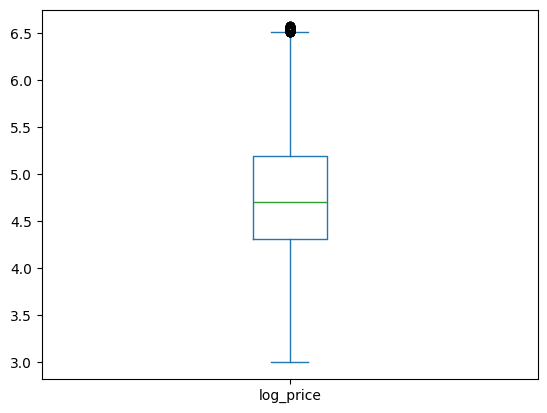

In [156]:
# removing outliers in log_price column using IQR method
df['log_price'].plot(kind = 'box')
plt.show()

In [155]:
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]

DATA VISUALISATION

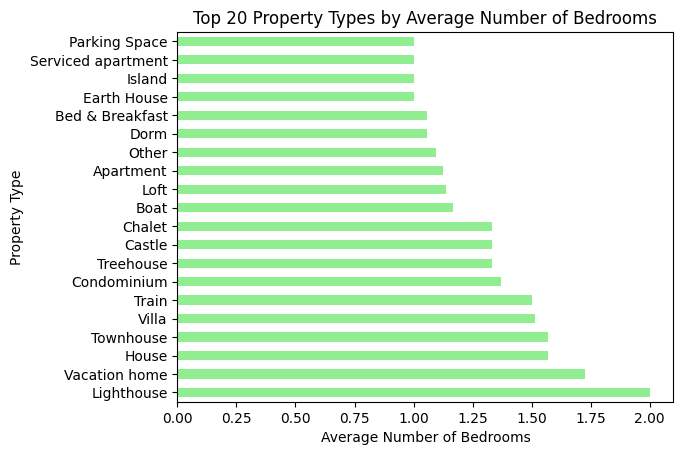

In [173]:
avg_bedrooms = df.groupby('property_type').bedrooms.mean().sort_values(ascending=False).head(20)
avg_bedrooms.plot(kind='barh', color='lightgreen')
plt.title('Top 20 Property Types by Average Number of Bedrooms')
plt.xlabel('Average Number of Bedrooms')
plt.ylabel('Property Type')
plt.show()

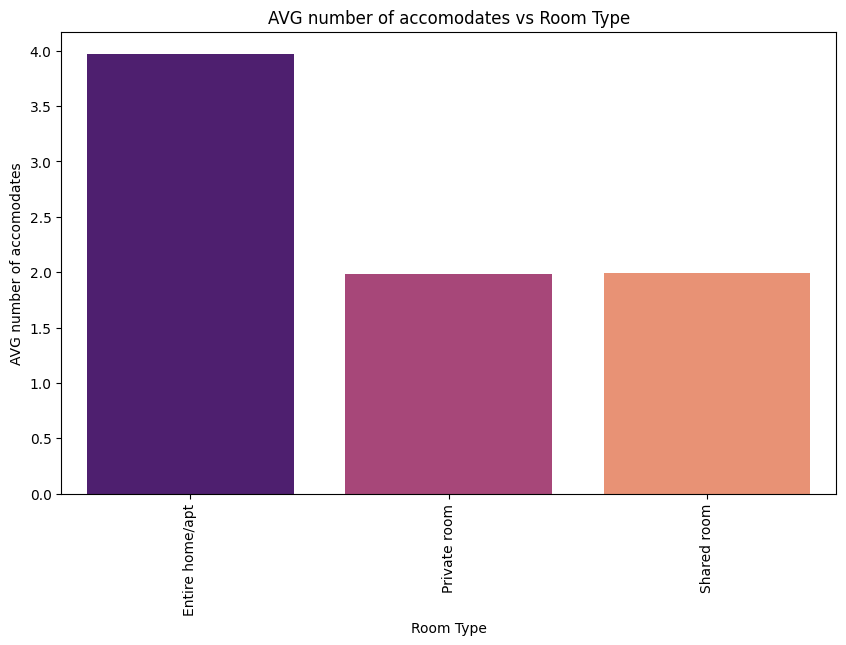

In [174]:
avg_accommodates = df.groupby('room_type').accommodates.mean()
plt.figure(figsize=(10,6))
plt.title('AVG number of accomodates vs Room Type')
plt.ylabel('AVG number of accomodates')
plt.xlabel('Room Type')
sns.barplot(x = avg_accommodates.index , y = avg_accommodates.values, palette = 'magma')
plt.xticks(rotation = 90)
plt.show()

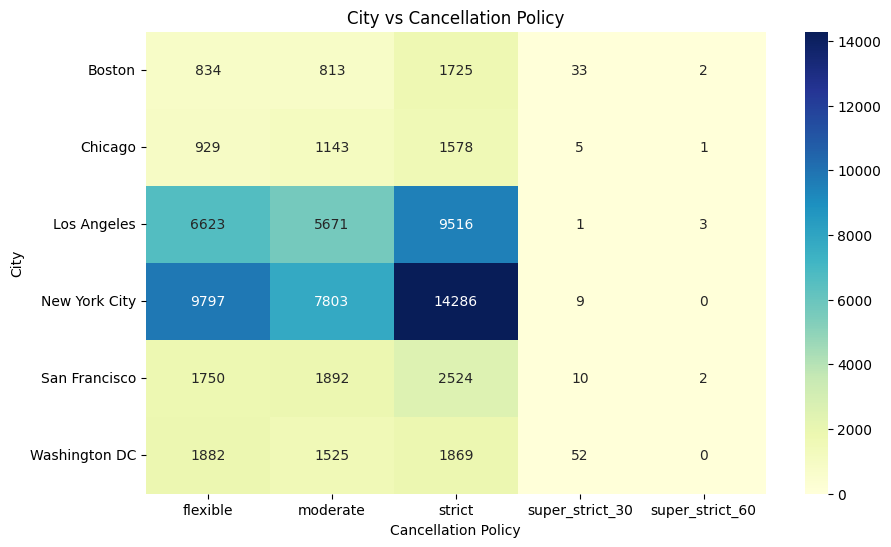

In [175]:
cancellation_table = pd.crosstab(df['city'], df['cancellation_policy'])
plt.figure(figsize=(10, 6))
sns.heatmap(cancellation_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('City vs Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('City')
plt.show()

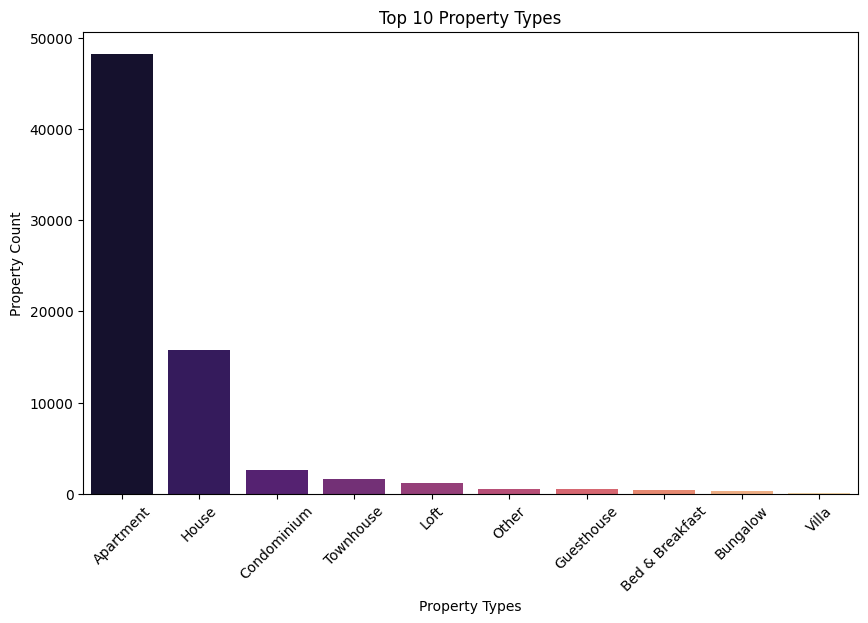

In [48]:
plt.figure(figsize=(10,6))
plt.title('Top 10 Property Types')
plt.ylabel('Property Count')
plt.xlabel('Property Types')
property_type_count = df['property_type'].value_counts().head(10)
sns.barplot(x=property_type_count.index, y=property_type_count.values, hue=property_type_count.index, palette='magma')
plt.xticks(rotation=45)
plt.show()


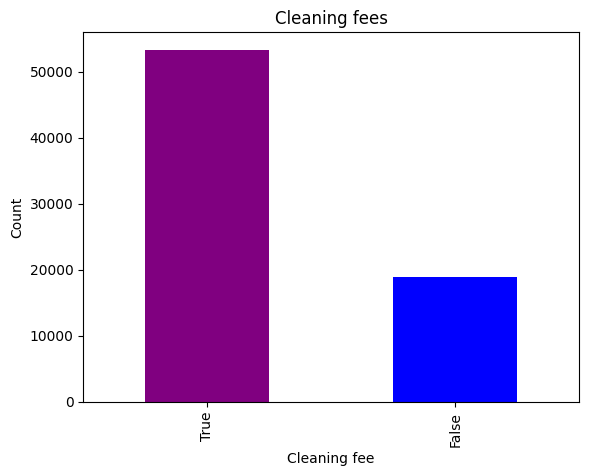

In [176]:
df.cleaning_fee.value_counts().plot(kind = 'bar', color=['purple','blue'])
plt.title('Cleaning fees')
plt.ylabel('Count')
plt.xlabel('Cleaning fee')
plt.show()

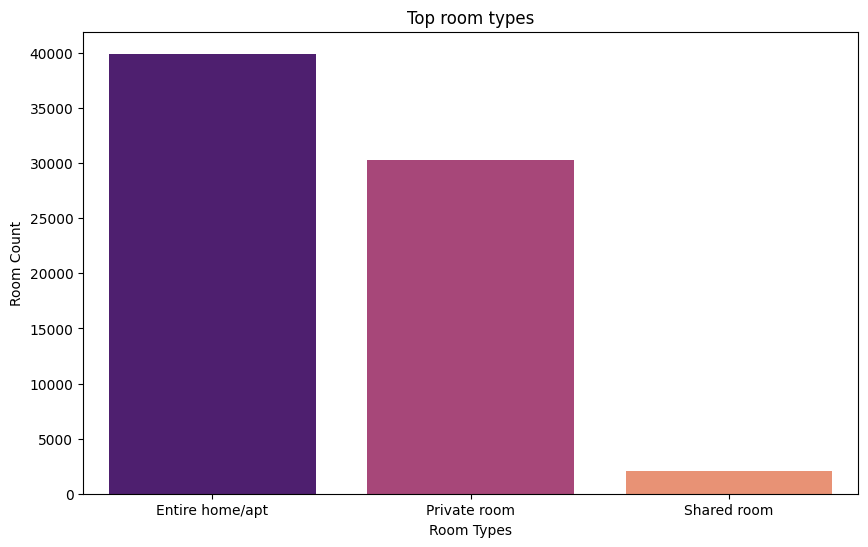

In [50]:
plt.figure(figsize=(10,6))
plt.title('Top room types')
plt.ylabel('Room Count')
plt.xlabel('Room Types')
room_type_count = df['room_type'].value_counts()
sns.barplot(x = room_type_count.index , y = room_type_count.values, hue=room_type_count.index,palette = 'magma')
plt.show()

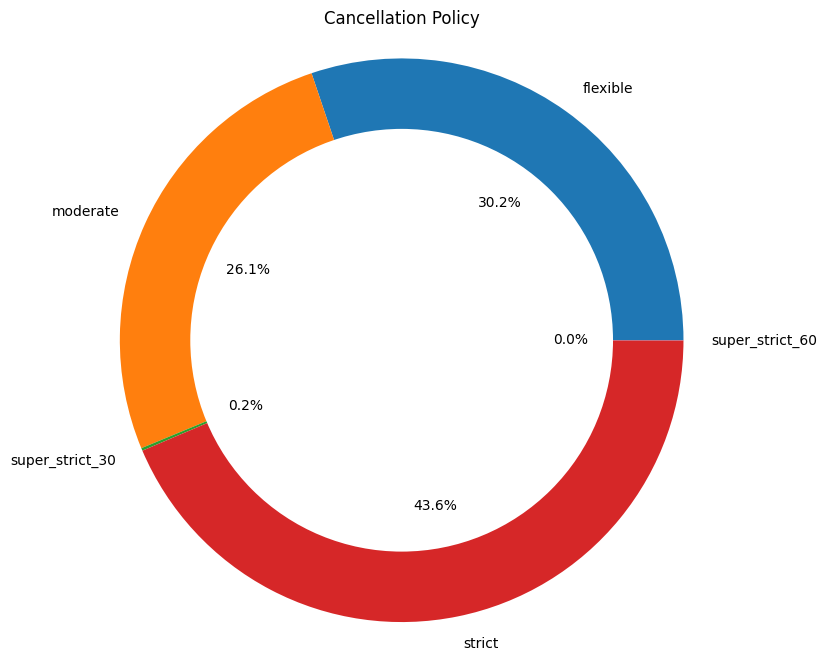

In [78]:
policy_counts = df['cancellation_policy'].value_counts().sort_index()

order=[ 'flexible', 'moderate', 'super_strict_30','strict','super_strict_60']
policy_counts=policy_counts.reindex(order)

plt.figure(figsize=(8, 8))
plt.title("Cancellation Policy")
plt.pie(policy_counts, labels=policy_counts.index, autopct="%1.1f%%")

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  
plt.show()

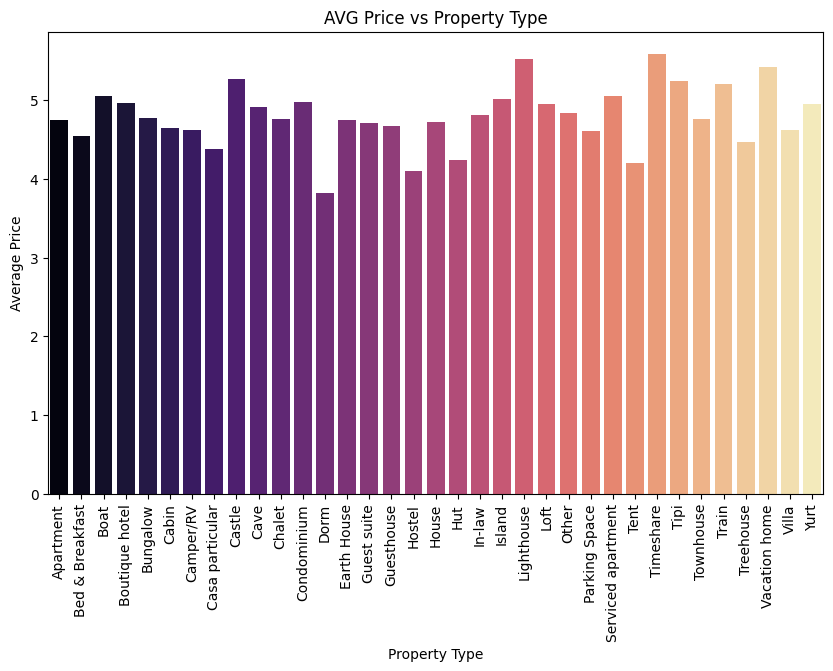

In [103]:
avg_price = df.groupby('property_type').log_price.mean()
plt.figure(figsize=(10,6))
plt.title('AVG Price vs Property Type')
plt.ylabel('Average Price')
plt.xlabel('Property Type')
sns.barplot(x = avg_price.index , y = avg_price.values, palette = 'magma')
plt.xticks(rotation = 90)
plt.show()